In [1]:
import os

# Create known_faces directory if it doesn't exist
known_faces_dir = "known_faces"
if not os.path.exists(known_faces_dir):
    os.makedirs(known_faces_dir)
    print(f"Created '{known_faces_dir}' directory. Please add images of known people there.")
else:
    print(f"'{known_faces_dir}' directory already exists.")

'known_faces' directory already exists.


In [1]:
import os
os.getcwd()


'C:\\Users\\daara\\face_recognition'

In [2]:
!pip install opencv-python face_recognition numpy matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os

# Verify folder structure
if not os.path.exists('known_faces'):
    os.makedirs('known_faces')
    print("Created 'known_faces' folder")
else:
    print("'known_faces' folder already exists")

# List current files in known_faces
print("\nFiles in known_faces:")
for file in os.listdir('known_faces'):
    print(f"- {file}")

'known_faces' folder already exists

Files in known_faces:
- .ipynb_checkpoints
- mesi.webp
- myyface.jpg
- ronaldo.jpg


In [4]:
import face_recognition
import numpy as np

known_face_encodings = []
known_face_names = []

for filename in os.listdir('known_faces'):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
        image_path = os.path.join('known_faces', filename)
        image = face_recognition.load_image_file(image_path)
        
        encodings = face_recognition.face_encodings(image)
        if encodings:  # If at least one face found
            known_face_encodings.append(encodings[0])
            name = os.path.splitext(filename)[0]
            known_face_names.append(name)
            print(f"Loaded: {name}")
        else:
            print(f"No faces detected in {filename}")

print("\nReady for recognition!")
print(f"Loaded {len(known_face_names)} faces: {', '.join(known_face_names)}")

Loaded: mesi
Loaded: myyface
Loaded: ronaldo

Ready for recognition!
Loaded 3 faces: mesi, myyface, ronaldo


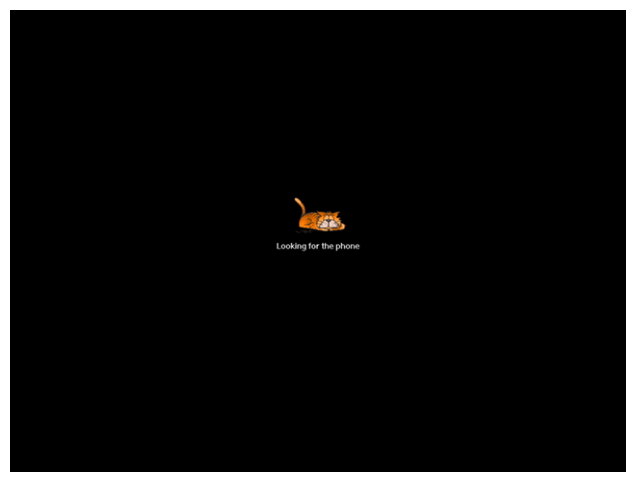

In [ ]:
# First install the required package if you haven't already
!pip install face_recognition opencv-python numpy matplotlib

# Now run the corrected code
import cv2
import face_recognition
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize known faces (you need to load these first)
known_face_encodings = []
known_face_names = []

def load_known_faces():
    """Load known faces from the known_faces directory"""
    global known_face_encodings, known_face_names
    
    for filename in os.listdir('known_faces'):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            image = face_recognition.load_image_file(f'known_faces/{filename}')
            encodings = face_recognition.face_encodings(image)
            if encodings:
                known_face_encodings.append(encodings[0])
                known_face_names.append(os.path.splitext(filename)[0])
    print(f"Loaded {len(known_face_names)} known faces")

# Load known faces before recognition
load_known_faces()

def recognize_faces():
    video_capture = cv2.VideoCapture(0)
    plt.figure(figsize=(10,6))
    
    try:
        while True:
            ret, frame = video_capture.read()
            if not ret:
                break
                
            # Convert to RGB and resize for faster processing
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            small_frame = cv2.resize(rgb_frame, (0, 0), fx=0.25, fy=0.25)
            
            # Find faces
            face_locations = face_recognition.face_locations(small_frame)
            face_encodings = face_recognition.face_encodings(small_frame, face_locations)
            
            face_names = []
            for face_encoding in face_encodings:
                matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
                name = "Unknown"
                
                if True in matches:
                    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
                    best_match_index = np.argmin(face_distances)
                    name = known_face_names[best_match_index]
                
                face_names.append(name)
            
            # Display results
            for (top, right, bottom, left), name in zip(face_locations, face_names):
                # Scale back up face locations
                top *= 4; right *= 4; bottom *= 4; left *= 4
                
                # Draw rectangle and label
                cv2.rectangle(rgb_frame, (left, top), (right, bottom), (0, 255, 0), 2)
                cv2.putText(rgb_frame, name, (left + 6, bottom - 6), 
                          cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 1)
            
            # Show in notebook
            plt.imshow(rgb_frame)
            plt.axis('off')
            display(plt.gcf())
            clear_output(wait=True)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    finally:
        video_capture.release()
        plt.close()

# Start recognition
print("Starting face recognition... Press 'q' to quit when using external window")
recognize_faces()

In [5]:
import numpy as np
from scipy.spatial import distance

# Simulated encoding vectors (replace with actual encodings from face_recognition)
person1_encoding = np.random.rand(128)
person2_encoding = np.random.rand(128)

# Calculate Euclidean Distance
euclidean_dist = np.linalg.norm(person1_encoding - person2_encoding)

# Or using scipy (same result)
euclidean_dist_scipy = distance.euclidean(person1_encoding, person2_encoding)

# Output
print("Euclidean Distance between the two face encodings:")
print(f"Using NumPy: {euclidean_dist:.4f}")
print(f"Using SciPy : {euclidean_dist_scipy:.4f}")

# Decision
threshold = 0.6
if euclidean_dist < threshold:
    print("Result: SAME person ✅")
else:
    print("Result: DIFFERENT person ❌")


ModuleNotFoundError: No module named 'scipy'